In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## DECISION TREES

Based on the features in our training dataset, the decision tree model learns a series of questions to infer the class labels of the examples.  For example, we could simply define a cut-off value along the sepal width feature axis and ask a binary question: “Is the sepal width ≥ 2.8 cm?”
Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG), which will be explained in more detail in the following section. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximum depth of the tree.

Information Gain is given as:
$$

IG(D_{p}, f) = I(D_{p}) - \sum_{i=1}^c \frac{N_{i}}{N_{p}} I(D_{i})

$$

Here, f is the feature to perform the split; Dp and Di are the dataset of the parent and ith child node; I is our impurity measure; Np is the total number of training examples at the parent node; and Ni is the number of examples in the ith child node

However, for simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees. This means that each parent node is split into two child nodes, Dleft and Dright:

The three impurity measures or splitting criteria that are commonly used in binary decision trees are Gini impurity (IG), entropy (IH), and the classification error (IE). 

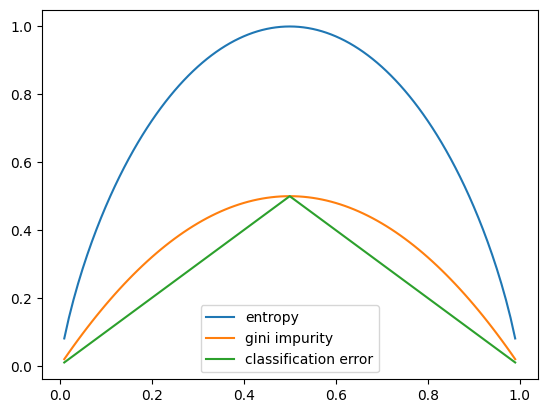

In [9]:
#assuming binary classes

def entropy(p):
    return  - p * np.log2(p) - (1 - p) * np.log2((1 - p)) 

def gini_impurity(p):
    return p*(1-p) + (1-p) *(1 - (1-p))

def class_error(p):
    return 1 - max(p, 1-p)

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
gini = [gini_impurity(p) if p != 0 else None for p in x]
ce = [class_error(p) if p != 0 else None for p in x]


plt.plot(x, ent, label="entropy")
plt.plot(x, gini, label="gini impurity")
plt.plot(x, ce, label="classification error")
plt.legend()

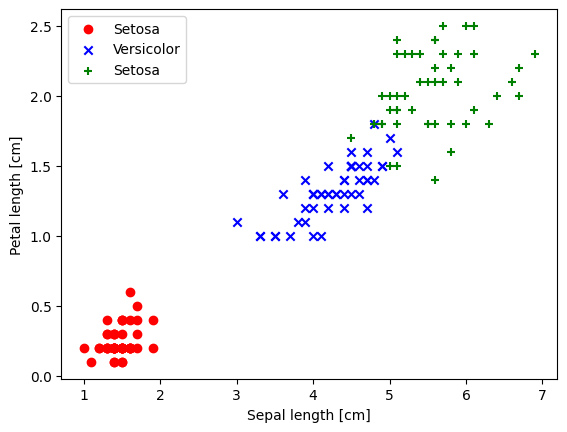

In [13]:
from sklearn import datasets
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, [2,3]]
y = iris_dataset.target

#plot them
plt.scatter(X[y==0, 0], X[y==0,1], color='red', marker='o', label='Setosa')
plt.scatter(X[y==1, 0], X[y==1,1], color='blue', marker='x', label='Versicolor')
plt.scatter(X[y==2, 0], X[y==2,1], color='green', marker='+', label='Setosa')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

print("Labels count in y: ", np.bincount(y))
print("Labels count in y_train: ", np.bincount(Y_train))
print("Labels count in y_test: ", np.bincount(Y_test))

Labels count in y:  [50 50 50]
Labels count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train, Y_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=1)
dtc.fit(X_train_std, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
resolution=0.02): # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

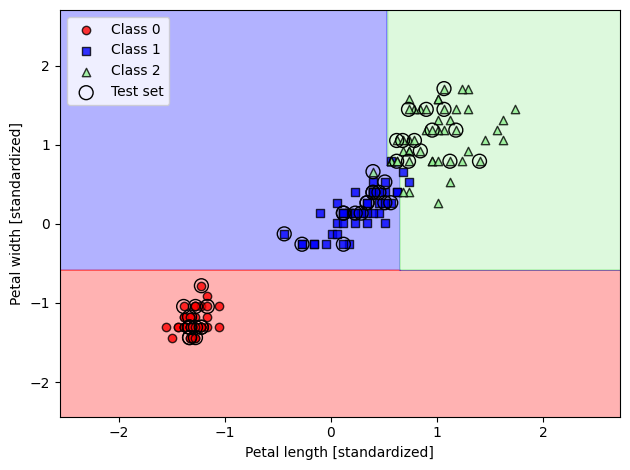

In [32]:
X_combined_std = np.vstack((X_train_std, X_test_std)) 
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=dtc, test_idx=range(105, 150)) 
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

[Text(0.25, 0.9, 'Sepal Width <= -0.586\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.375, 0.7, 'Sepal Length <= 0.536\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'Sepal Width <= 0.725\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'Sepal Length <= 0.647\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'Sepal Length <= 0.591\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

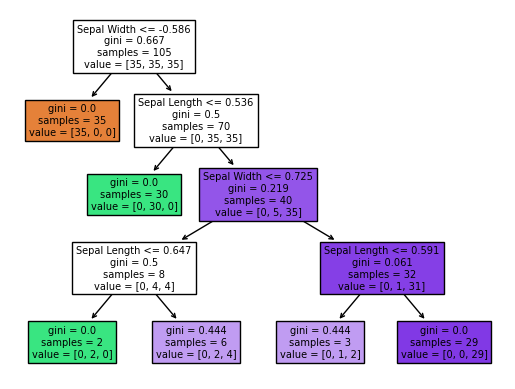

In [33]:
from sklearn.tree import plot_tree

plot_tree(dtc, feature_names=['Sepal Length', 'Sepal Width'], filled=True)

## Ensemble of Decision Trees: Random Forest

A random forest can be considered as an ensemble of decision trees. The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance to build a more robust model that has a better generalization performance and is less susceptible to overfitting. The random forest algorithm can be summarized in four simple steps:
1. Draw a random bootstrap sample of size n (randomly choose n examples from the training dataset with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:
        a) Randomly select d features without replacement.
        b) Split the node using the feature that provides the best split according to the objective
function, for instance, maximizing the information gain.
3. Repeat steps 1-2 k times.
4. Aggregate the prediction by each tree to assign the class label by majority vote.

Decreasing the size of the bootstrap sample increases the diversity among the individual trees since the probability that a particular training example is included in the bootstrap sample is lower. Thus, shrinking the size of the bootstrap samples may increase the randomness of the random forest, and it can help to reduce the effect of overfitting. However, smaller bootstrap samples typically result in a lower overall performance of the random forest and a small gap between training and test performance, but a low test performance overall. Conversely, increasing the size of the bootstrap sample may increase the degree of overfitting. Because the bootstrap samples, and consequently the individual decision trees, become more similar to one another, they learn to fit the original training dataset more closely

In [47]:
from sklearn.ensemble import RandomForestClassifier
 
rfc = RandomForestClassifier(n_estimators=25, random_state=1)  #n_estimators = no. of trees
rfc.fit(X_train_std, Y_train)


RandomForestClassifier(n_estimators=25, random_state=1)

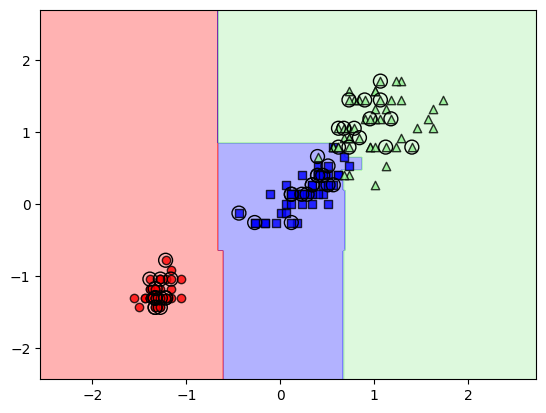

In [48]:
plot_decision_regions(X_combined_std, y_combined, classifier=rfc, test_idx=range(105, 150))

# KNN (K-Nearest Neighbors)
KNN is a typical example of a lazy learner. It is called “lazy” not because of its apparent simplicity, but because it doesn’t learn a discriminative function from the training data but memorizes the training dataset instead.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:
1. Choose the number of k and a distance metric
2. Find the k-nearest neighbors of the data record that we want to classify
3. Assign the class label by majority vote

Based on the chosen distance metric, the KNN algorithm finds the k examples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the data point is then determined by a majority vote among its k nearest neighbors.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")   

The right choice of k is crucial to finding a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. Often, a simple Euclidean distance measure is used for real-value examples, for example, the flowers in our Iris dataset, which have features measured in centimeters. However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance. The minkowski distance that we used in the previous code is just a generalization of the Euclidean and Manhattan distance, which can be written as follows:
$$
    d(x^{i}, x^{j}) = \sqrt[p]{{\sum_{k=1}^{n}|x^i_{k} - x^j_{k}|^p}}
$$

for p = 2 it's is euclidean

Lastly, it is important to mention that KNN is very susceptible to overfitting due to the curse of dimen- sionality. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.

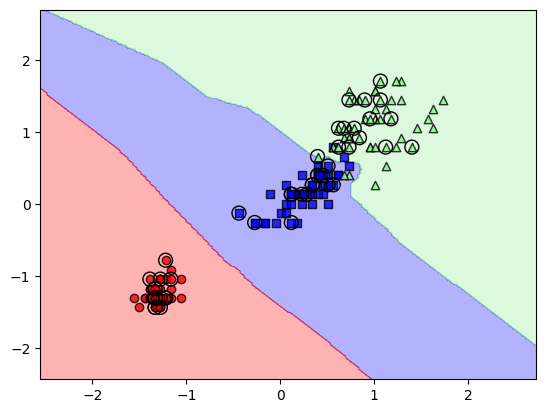

In [51]:
knn.fit(X_train_std, Y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))